In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Resized Image Dimensions: 584x1116


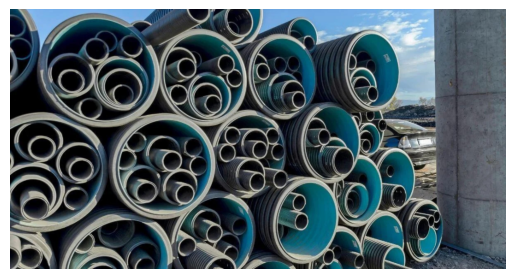

In [2]:
# 读取图像并转换颜色空间
image = cv.imread(r"D:\MyProject\CV\CV2\pipes-6.jpg")
src = cv.cvtColor(image, cv.COLOR_BGR2RGB)
 
# 调整图像大小
scale_factor = 0.93
new_height, new_width = int(src.shape[0] * scale_factor), int(src.shape[1] * scale_factor)
resized_image = cv.resize(src, (new_width, new_height), interpolation=cv.INTER_LINEAR)
 
# 显示并打印图像尺寸
plt.imshow(resized_image)
plt.axis('off')
print(f"Resized Image Dimensions: {new_height}x{new_width}")
plt.show()

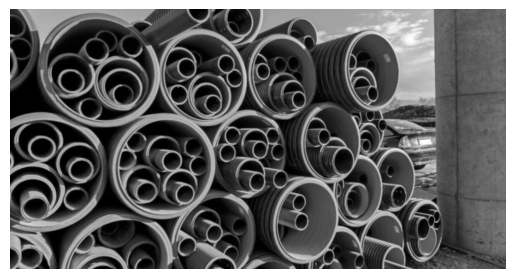

In [3]:
# 转换为灰度图并应用高斯模糊
gray = cv.cvtColor(resized_image, cv.COLOR_RGB2GRAY)
gray = cv.GaussianBlur(gray, (3, 3), 0)  # 调整模糊核大小
 
# 显示灰度图
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

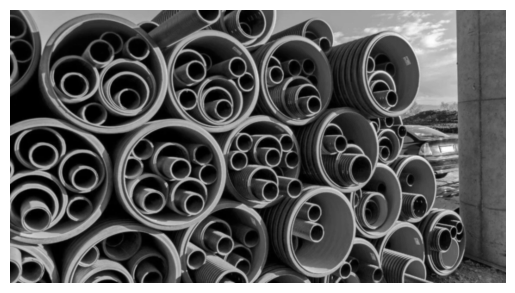

In [4]:
# 定义ROI（感兴趣区域）
x1, y1, x2, y2 = 0, 0, 1060, new_height  # 根据新高度调整y2
cut = gray[y1:y2, x1:x2]

# 显示ROI
plt.imshow(cut, cmap='gray')
plt.axis('off')
plt.show()

Total pipes: 102


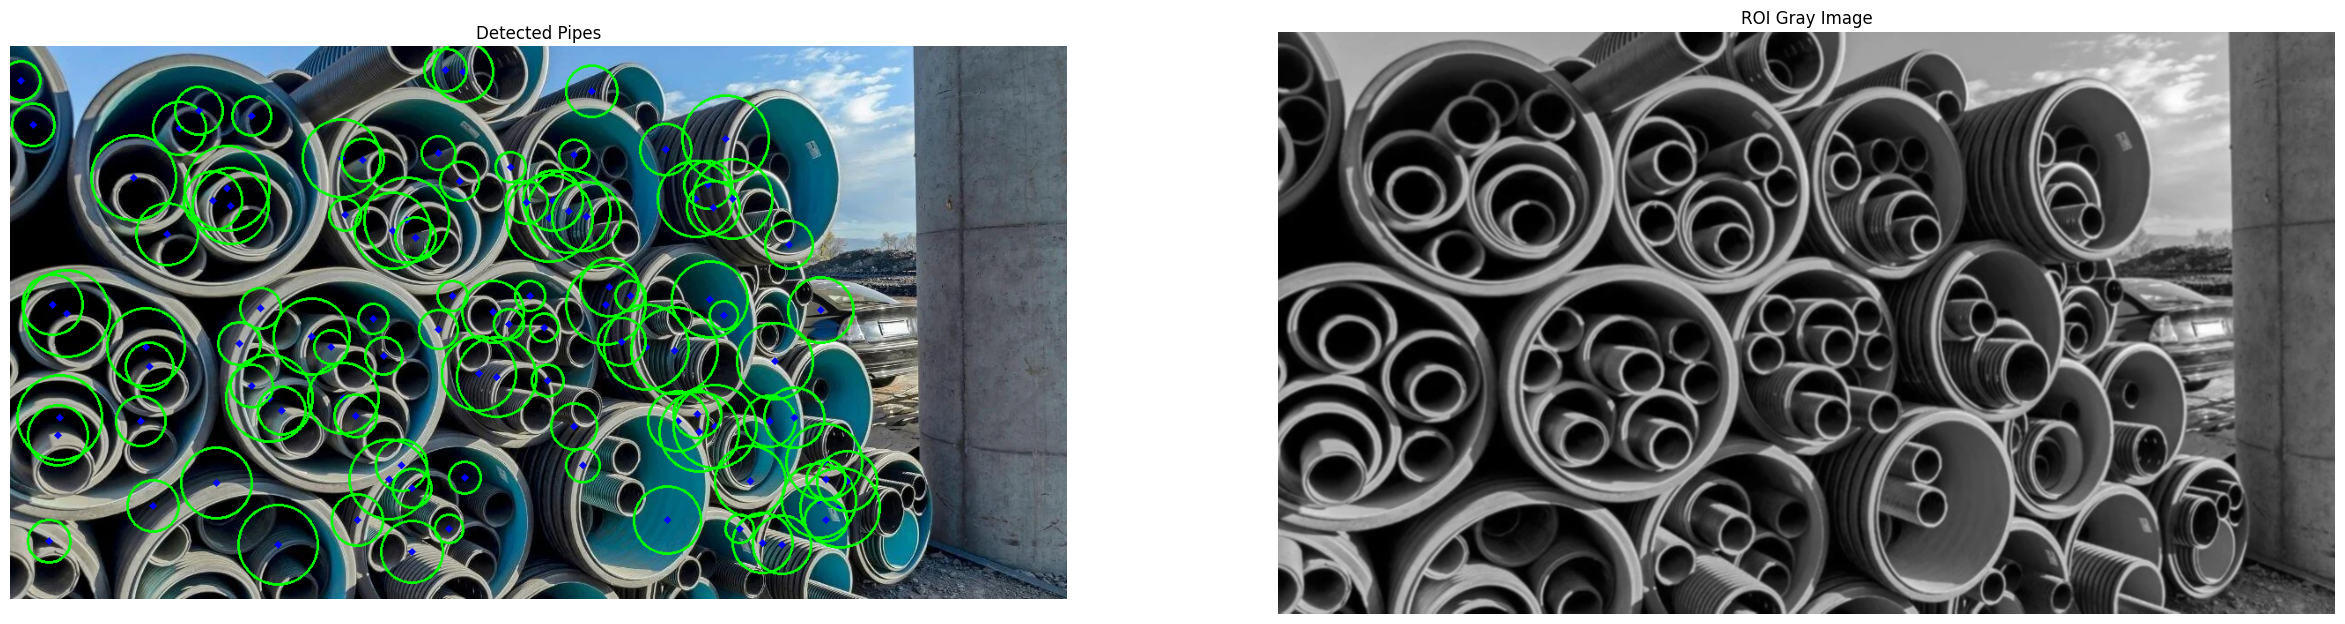

In [5]:
# 使用霍夫圆变换检测圆
detected_circles = cv.HoughCircles(
    cut,
    cv.HOUGH_GRADIENT,
    dp=1,  # 累加器分辨率与图像分辨率的反比
    minDist=20,  # 圆心之间的最小距离
    param1=86,  # Canny边缘检测的高阈值
    param2=37,  # 检测阶段圆心检测阈值
    minRadius=10, maxRadius=50  # 最小和最大圆半径
)
 
# 如果检测到圆，绘制在原图上
if detected_circles is not None:
    detected_circles = np.round(detected_circles[0, :]).astype("int")
    pipes_count = 0
    for (x, y, r) in detected_circles:
        cv.circle(image, (x, y), r, (0, 255, 0), 2)
        cv.circle(image, (x, y), 2, (255, 0, 0), 3)
        pipes_count += 1
 
    print(f"Total pipes: {pipes_count}")
 
    # 显示结果图像和ROI灰度图（这里使用原图src可能不太合适，应使用resized_image或处理后的image）
    fig, axs = plt.subplots(1, 2, figsize=(30, 15))
    axs[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))  # 转换回RGB以正确显示颜色
    axs[0].set_title('Detected Pipes')
    axs[0].axis('off')
 
    axs[1].imshow(cut, cmap='gray')
    axs[1].set_title('ROI Gray Image')
    axs[1].axis('off')
 
    plt.show()